<a href="https://colab.research.google.com/github/davidromeropro/Sustainability-of-Countries/blob/main/ONU_Sustainability_of_Countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO: ONU Sustainability of Countries**

> Indented block


## Creado por: David Romero

* Fecha creado: 09/04/2023
* Fecha de actualización: 09/04/2023
* Descripción: Proyecto 2

In [ ]:
# Imports
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('~/Developer/gdrive/CodingDojo/Week8/Assignments/unsdg_2002_2021.csv')
df.head()

,dt_year,dt_date,country,region,level_of_development,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,mortality_rate_perc,renewable_energy_share_on_the_total_energy_consumption,co2emissions_from_fuel_combustion_in_millions_of_tonnes,fossilfuel_subsidies_consumption_and_production_billionusd,randd_expenditure_proportionofgdp_perc,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area
0,2002,2002-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,NaN,0.68,0.420344,8.0,NaN,37.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,2003-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.120955,50.00,0.105249,9.0,NaN,36.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,2004-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.176214,57.80,-0.014901,11.0,NaN,44.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,2005-01-01,Afghanistan,Central and Southern Asia,Least Developed,19.32802,0.180929,186.90,0.036212,12.0,0.409,33.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,2006-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.302234,271.00,0.053648,14.0,NaN,31.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   dt_year                                                          5176 non-null   int64  
 1   dt_date                                                          5176 non-null   object 
 2   country                                                          5176 non-null   object 
 3   region                                                           5176 non-null   object 
 4   level_of_development                                             5176 non-null   object 
 5   greenhousegas_emissione_mtco2equivalent                          1192 non-null   float64
 6   total_government_revenue_proportion_of_gdp_perc                  2693 non-null   float64
 7   fdi_inflows_millionusd                    

# Para cumplir con los requisitos para esta semana, deben haber:

# -eliminado las columnas innecesarias

In [ ]:
df.shape

(5176, 20)

In [ ]:
df.drop(columns = ['dt_year', 'dt_date'], inplace=True)

# -eliminado las filas duplicadas

In [ ]:
df.duplicated().sum()

598

In [ ]:
# Drop of duplicates
df.drop_duplicates(inplace=True)

# -identificado y abordado los valores faltantes 

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Porcentaje de valores faltantes
missing_values = pd.DataFrame(df.isna().sum()/df.shape[0], columns=['Missing %']).sort_values(by='Missing %', ascending=False)
missing_values['# Missing'] = df.isna().sum() 
missing_values

,Missing %,# Missing
enhance_policy_coherence_for_sustainable_development,0.994321,4552
national_action_plans_as_priority_national_policies,0.981433,4493
land_degraded_over_total_land_area,0.972914,4454
education_for_sustainable_development,0.946702,4334
number_of_companies_publishing_sustainability_reports,0.918305,4204
mortality_rate_perc,0.840105,3846
fossilfuel_subsidies_consumption_and_production_billionusd,0.750765,3437
greenhousegas_emissione_mtco2equivalent,0.739624,3386
randd_expenditure_proportionofgdp_perc,0.657055,3008
co2emissions_from_fuel_combustion_in_millions_of_tonnes,0.433595,1985


In [ ]:
df[missing_values.index].describe()

,enhance_policy_coherence_for_sustainable_development,national_action_plans_as_priority_national_policies,land_degraded_over_total_land_area,education_for_sustainable_development,number_of_companies_publishing_sustainability_reports,mortality_rate_perc,fossilfuel_subsidies_consumption_and_production_billionusd,greenhousegas_emissione_mtco2equivalent,randd_expenditure_proportionofgdp_perc,co2emissions_from_fuel_combustion_in_millions_of_tonnes,total_government_revenue_proportion_of_gdp_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,fdi_inflows_millionusd,renewable_energy_share_on_the_total_energy_consumption,annual_growth_rate_perc
count,26.000000,85.0,124.000000,244.000000,374.000000,732.000000,1141.000000,1192.000000,1570.000000,2593.000000,2693.000000,3622.000000,3879.000000,4002.000000,4007.000000
mean,75.057692,1.0,19.758065,0.224266,104.366310,0.214265,2.108094,349.787220,0.009325,198.678172,0.312233,62.464384,6936.474018,28.508533,0.018018
std,14.906762,0.0,16.824475,0.389714,221.356147,0.081235,6.041866,1082.433384,0.009582,799.512661,0.191328,36.650121,23920.119094,29.169956,0.060981
min,42.500000,1.0,0.000000,0.000000,2.000000,0.073000,0.000000,0.004870,0.000054,0.360000,0.000000,5.000000,-79077.278700,0.000000,-0.602688
25%,68.750000,1.0,7.000000,0.000000,4.000000,0.157000,0.000020,14.630493,0.002308,6.780000,0.199375,23.000000,73.654190,3.570000,-0.002505
50%,75.625000,1.0,16.000000,0.000000,30.000000,0.212000,0.086730,65.117955,0.005638,25.990000,0.286012,83.500000,583.000000,17.440000,0.020006
75%,86.875000,1.0,27.000000,0.438000,105.500000,0.258000,1.375500,315.587295,0.012933,93.360000,0.388703,95.000000,3205.210525,47.070000,0.043842
max,100.000000,1.0,97.000000,1.000000,2192.000000,0.545000,81.627780,12300.200000,0.049408,9876.500000,3.656346,95.000000,467625.000000,98.270000,0.946140


In [ ]:
(missing_values['# Missing'] > 0).sum()

15

# Imputación con constante 0

In [ ]:
constant = SimpleImputer(strategy='constant',fill_value= 0)

## 1. national_action_plans_as_priority_national_policies

In [ ]:
column = 'national_action_plans_as_priority_national_policies'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 4493
Missing values %: 0.9814


count    85.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: national_action_plans_as_priority_national_policies, dtype: float64

In [ ]:
df['national_action_plans_as_priority_national_policies'].value_counts()

1.0    85
Name: national_action_plans_as_priority_national_policies, dtype: int64

Los datos corresponden a un booleano, se asume que los valores faltantes correspoden a 0.

# Imputación con promedio agrupado por país

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

# Fuente: https://towardsdatascience.com/coding-a-custom-imputer-in-scikit-learn-31bd68e541de
class GroupImputer(BaseEstimator, TransformerMixin):
    '''
    Class used for imputing missing values in a pd.DataFrame using either mean or median of a group.
    
    Parameters
    ----------    
    group_cols : list
        List of columns used for calculating the aggregated value 
    target : str
        The name of the column to impute
    metric : str
        The metric to be used for remplacement, can be one of ['mean', 'median']
    Returns
    -------
    X : array-like
        The array with imputed values in the target column
    '''
    def __init__(self, group_cols, target, metric='mean'):
        
        assert metric in ['mean', 'median'], 'Unrecognized value for metric, should be mean/median'
        assert type(group_cols) == list, 'group_cols should be a list of columns'
        assert type(target) == str, 'target should be a string'
        
        self.group_cols = group_cols
        self.target = target
        self.metric = metric
    
    def fit(self, X, y=None):
        
        assert pd.isnull(X[self.group_cols]).any(axis=None) == False, 'There are missing values in group_cols'
        
        impute_map = X.groupby(self.group_cols)[self.target].agg(self.metric) \
                                                            .reset_index(drop=False)
        
        self.impute_map_ = impute_map
        
        return self 
    
    def transform(self, X, y=None):
        
        # make sure that the imputer was fitted
        check_is_fitted(self, 'impute_map_')
        
        X = X.copy()
        
        for index, row in self.impute_map_.iterrows():
            ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
            X.loc[ind, self.target] = X.loc[ind, self.target].fillna(row[self.target])
        
        return X.values

## 2. enhance_policy_coherence_for_sustainable_development

Proportion of policies that incorporate sustainable development considerations, linking to SDGs and targets.

## 3. land_degraded_over_total_land_area	

Land degradation is defined as the reduction or loss of the biological or economic productivity and complexity of rain fed cropland, irrigated cropland, or range, pasture, forest and woodlands resulting from a combination of pressures, including land use and management practices.

In [ ]:
column = 'land_degraded_over_total_land_area'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 4454
Missing values %: 0.9729


count    124.000000
mean      19.758065
std       16.824475
min        0.000000
25%        7.000000
50%       16.000000
75%       27.000000
max       97.000000
Name: land_degraded_over_total_land_area, dtype: float64

In [ ]:
df.groupby(['country'])['land_degraded_over_total_land_area'].max().nlargest(n=5)

country
Tajikistan      97.0
Belize          81.0
South Africa    78.0
Bangladesh      65.0
Kuwait          64.0
Name: land_degraded_over_total_land_area, dtype: float64

In [ ]:
df[df['country']=='Ecuador']['land_degraded_over_total_land_area']

1380     NaN
1381     NaN
1382     NaN
1383     NaN
1384     NaN
1385     NaN
1386     NaN
1387     NaN
1388     NaN
1389     NaN
1390     NaN
1391     NaN
1392     NaN
1393    30.0
1394     NaN
1395     NaN
1396     NaN
1397     NaN
1398     NaN
1399     NaN
Name: land_degraded_over_total_land_area, dtype: float64

## 4. education_for_sustainable_development

Education for sustainable development (ESD) is UNESCO’s education sector response to the urgent and dramatic challenges the planet faces. The collective activities of human beings have altered the earth’s ecosystems so that our very survival seems in danger because of changes more difficult to reverse every day. To contain global warming before it reaches catastrophic levels means addressing environmental, social and economic issues in a holistic way

In [ ]:
column = 'education_for_sustainable_development'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 4334
Missing values %: 0.9467


count    244.000000
mean       0.224266
std        0.389714
min        0.000000
25%        0.000000
50%        0.000000
75%        0.438000
max        1.000000
Name: education_for_sustainable_development, dtype: float64

Los datos corresponden a porcentajes, se asume que los valores faltantes correspoden a 0%.

## 5. number_of_companies_publishing_sustainability_reports

In [ ]:
column = 'number_of_companies_publishing_sustainability_reports'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 4204
Missing values %: 0.9183


count     374.000000
mean      104.366310
std       221.356147
min         2.000000
25%         4.000000
50%        30.000000
75%       105.500000
max      2192.000000
Name: number_of_companies_publishing_sustainability_reports, dtype: float64

## 6. mortality_rate_perc

In [ ]:
column = 'mortality_rate_perc'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 3846
Missing values %: 0.8401


count    732.000000
mean       0.214265
std        0.081235
min        0.073000
25%        0.157000
50%        0.212000
75%        0.258000
max        0.545000
Name: mortality_rate_perc, dtype: float64

## 7. fossilfuel_subsidies_consumption_and_production_billionusd

In [ ]:
column = 'fossilfuel_subsidies_consumption_and_production_billionusd'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 3437
Missing values %: 0.7508


count    1141.000000
mean        2.108094
std         6.041866
min         0.000000
25%         0.000020
50%         0.086730
75%         1.375500
max        81.627780
Name: fossilfuel_subsidies_consumption_and_production_billionusd, dtype: float64

## 8. greenhousegas_emissione_mtco2equivalent

In [ ]:
column = 'greenhousegas_emissione_mtco2equivalent'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 3386
Missing values %: 0.7396


count     1192.000000
mean       349.787220
std       1082.433384
min          0.004870
25%         14.630493
50%         65.117955
75%        315.587295
max      12300.200000
Name: greenhousegas_emissione_mtco2equivalent, dtype: float64

## 9. randd_expenditure_proportionofgdp_perc

In [ ]:
column = 'randd_expenditure_proportionofgdp_perc'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 3008
Missing values %: 0.6571


count    1570.000000
mean        0.009325
std         0.009582
min         0.000054
25%         0.002308
50%         0.005638
75%         0.012933
max         0.049408
Name: randd_expenditure_proportionofgdp_perc, dtype: float64

## 10. co2emissions_from_fuel_combustion_in_millions_of_tonnes

In [ ]:
column = 'co2emissions_from_fuel_combustion_in_millions_of_tonnes'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 1985
Missing values %: 0.4336


count    2593.000000
mean      198.678172
std       799.512661
min         0.360000
25%         6.780000
50%        25.990000
75%        93.360000
max      9876.500000
Name: co2emissions_from_fuel_combustion_in_millions_of_tonnes, dtype: float64

## 11. total_government_revenue_proportion_of_gdp_perc

In [ ]:
column = 'total_government_revenue_proportion_of_gdp_perc'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 1885
Missing values %: 0.4118


count    2693.000000
mean        0.312233
std         0.191328
min         0.000000
25%         0.199375
50%         0.286012
75%         0.388703
max         3.656346
Name: total_government_revenue_proportion_of_gdp_perc, dtype: float64

## 12. proportion_of_population_with_primary_reliance_on_clean_fuels_a

In [ ]:
column = 'proportion_of_population_with_primary_reliance_on_clean_fuels_a'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 956
Missing values %: 0.2088


count    3622.000000
mean       62.464384
std        36.650121
min         5.000000
25%        23.000000
50%        83.500000
75%        95.000000
max        95.000000
Name: proportion_of_population_with_primary_reliance_on_clean_fuels_a, dtype: float64

## 13. fdi_inflows_millionusd

In [ ]:
column = 'fdi_inflows_millionusd'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 699
Missing values %: 0.1527


count      3879.000000
mean       6936.474018
std       23920.119094
min      -79077.278700
25%          73.654190
50%         583.000000
75%        3205.210525
max      467625.000000
Name: fdi_inflows_millionusd, dtype: float64

## 14. annual_growth_rate_perc

In [ ]:
column = 'annual_growth_rate_perc'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 571
Missing values %: 0.1247


count    4007.000000
mean        0.018018
std         0.060981
min        -0.602688
25%        -0.002505
50%         0.020006
75%         0.043842
max         0.946140
Name: annual_growth_rate_perc, dtype: float64

## 15. renewable_energy_share_on_the_total_energy_consumption

In [ ]:
column = 'renewable_energy_share_on_the_total_energy_consumption'
print('Missing values:',df[column].isna().sum())
print('Missing values %:',(df[column].isna().sum()/df.shape[0]).round(4))
df[column].describe()

Missing values: 576
Missing values %: 0.1258


count    4002.000000
mean       28.508533
std        29.169956
min         0.000000
25%         3.570000
50%        17.440000
75%        47.070000
max        98.270000
Name: renewable_energy_share_on_the_total_energy_consumption, dtype: float64

# -identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

In [ ]:
for column in df[cat_selector].columns[1:]:
    print(f'{column}\n')
    print(f'{df[column].unique()}\n')

region

['Central and Southern Asia' 'Europe and North America'
 'North Africa and Western Asia' 'Other' 'Sub-Saharan Africa'
 'Latin America and the Caribbean' 'Oceania'
 'Eastern and South Eastern Asia']

level_of_development

['Least Developed' 'Not Specified' 'Economies in Transition'
 'Developing Economies' 'Developed Economies']



In [ ]:
df['country'].unique()

array(['Afghanistan', 'Åland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Areas not elsewhere specified',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Christmas Island',
       'Cocos (Keeling) Islands', 'Colombia', 

In [ ]:
df['country'].value_counts().describe()

count    259.000000
mean      17.675676
std        5.685135
min        1.000000
25%       20.000000
50%       20.000000
75%       20.000000
max       20.000000
Name: country, dtype: float64

Hay 259 paises y cada uno tiene 20 registros

# -producido visuales univariantes para el objetivo y todas las características

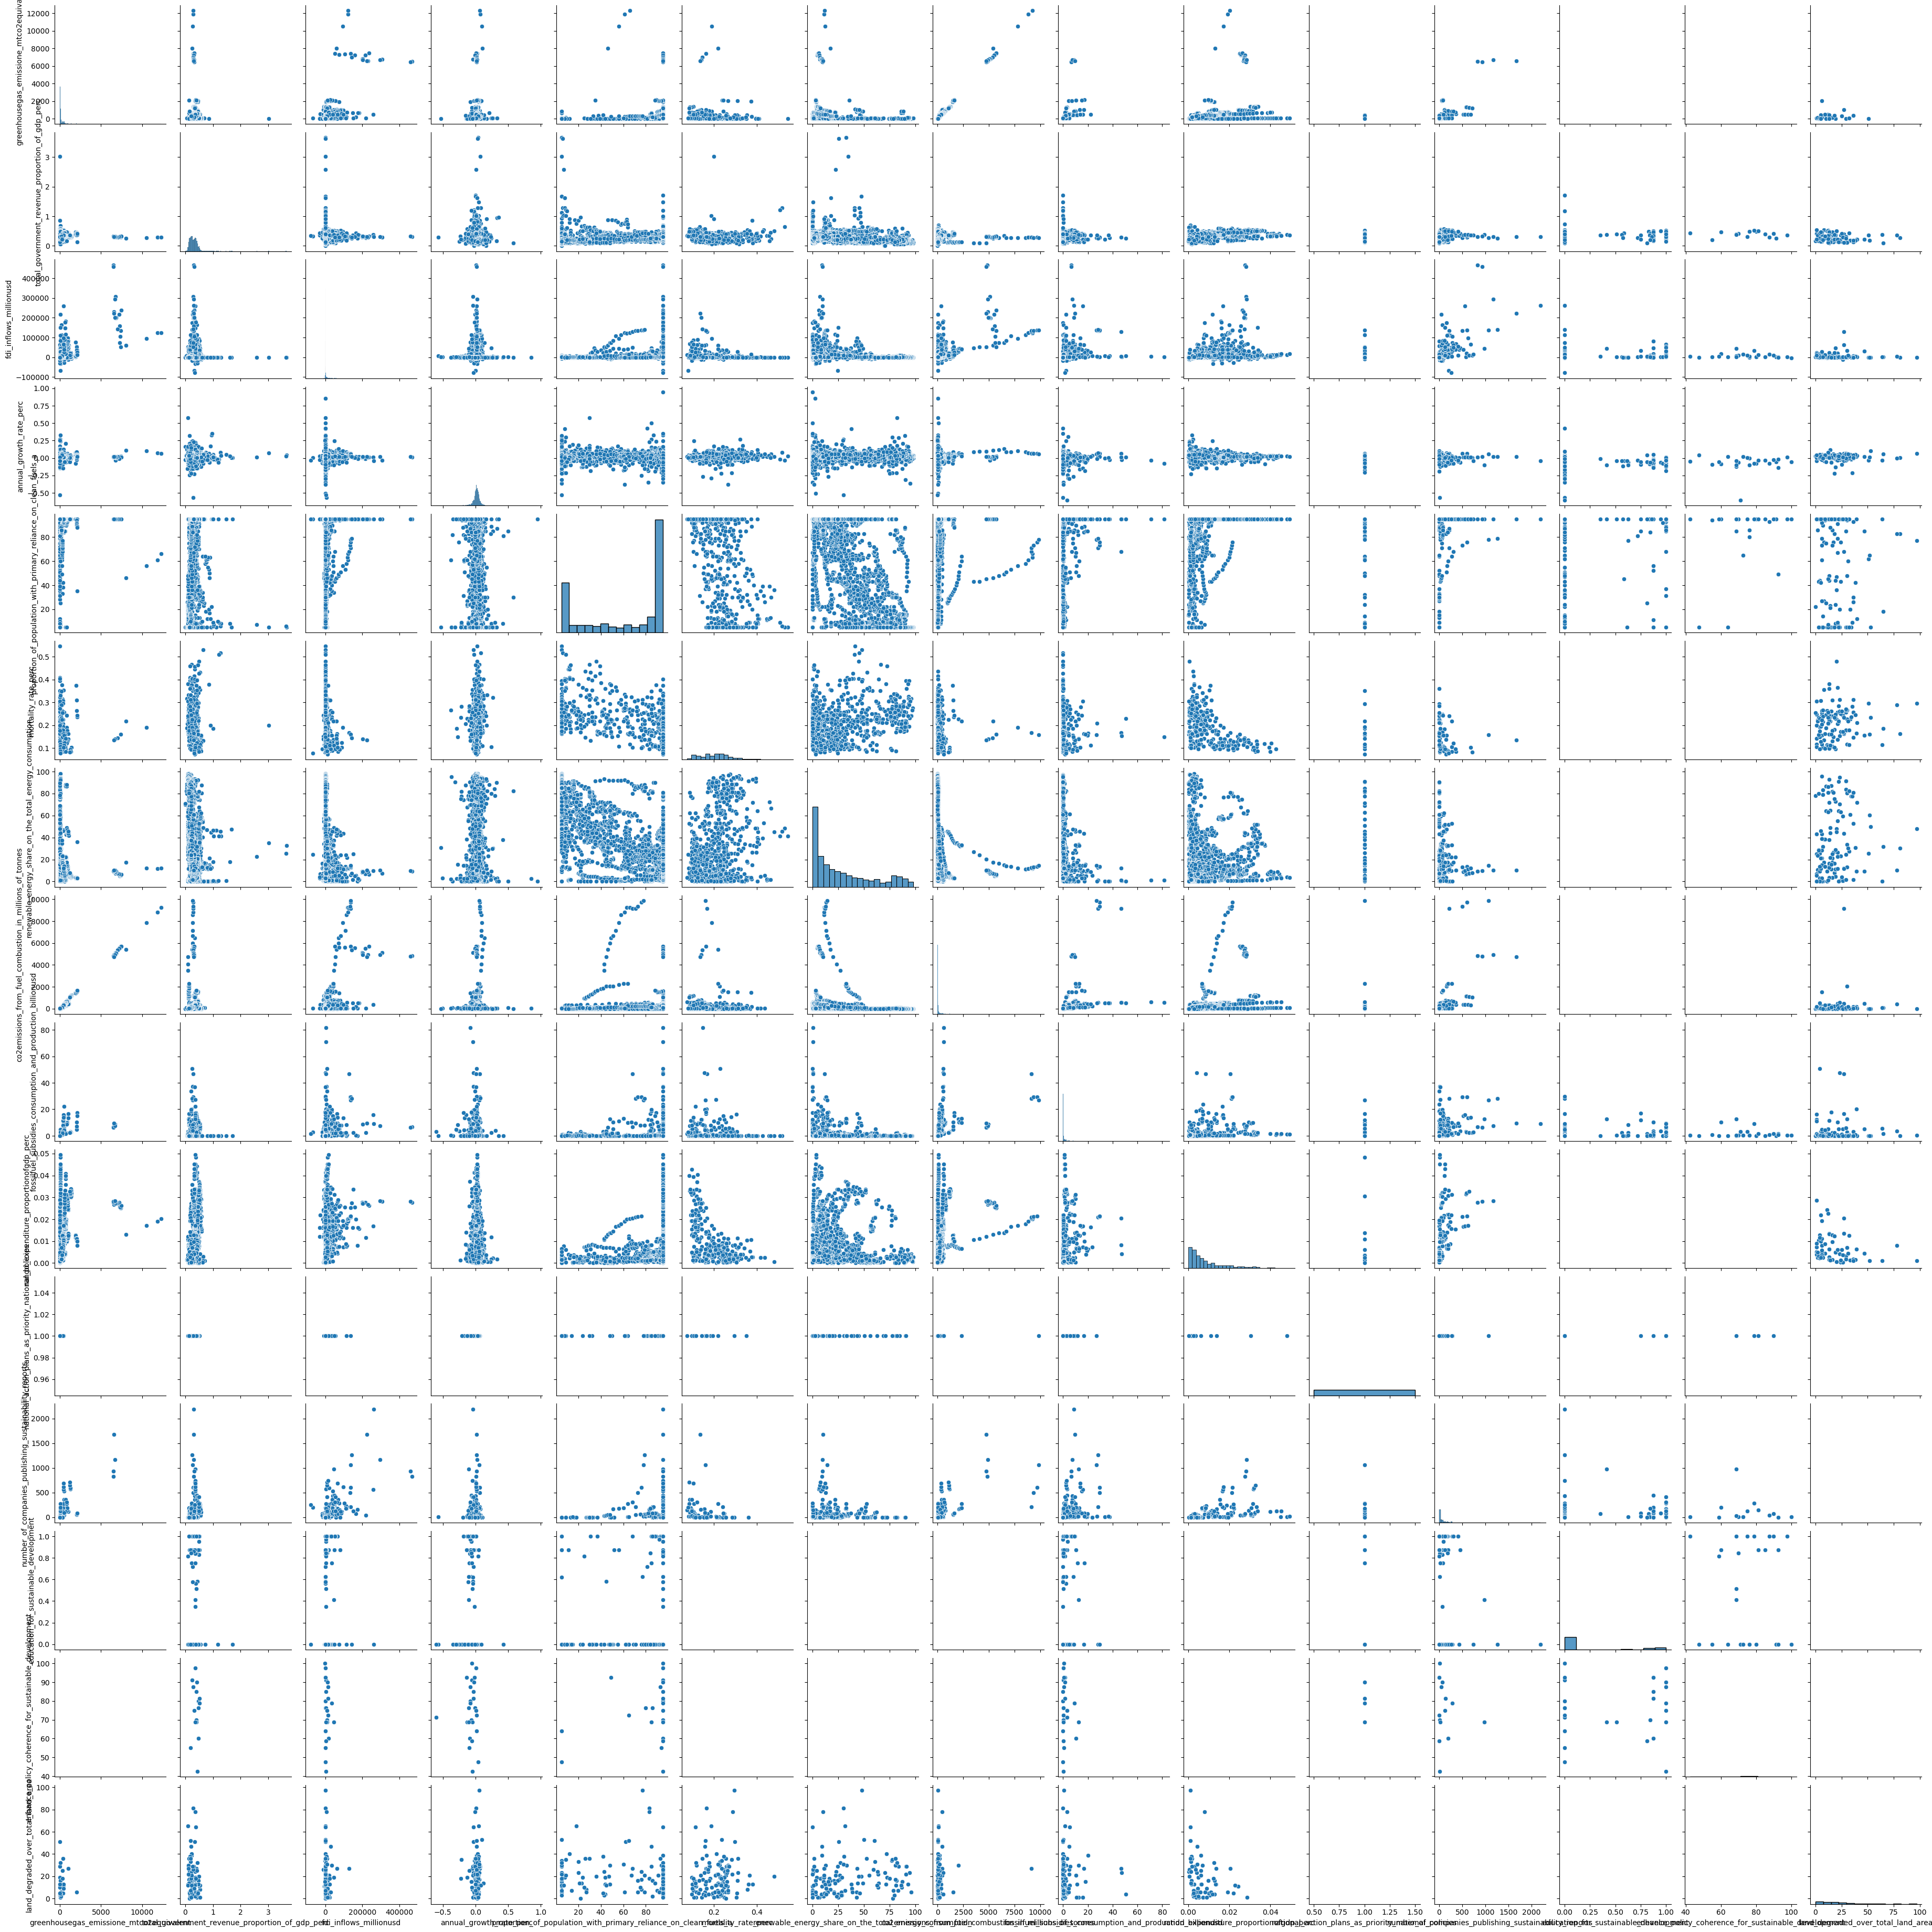

In [ ]:
sns.pairplot(df)

In [ ]:
def custom_bar_plot(column, ylabel):
    plt.figure(figsize=(10,6));
    data = pd.DataFrame(df.groupby(['country'])[column].mean().nlargest(n=5,keep='all'))
    data.loc['Ecuador'] = [df[df['country']=='Ecuador'][column].mean()]
    colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
    y_pos = np.arange(len(data))
    plt.bar(y_pos, data[column],color=colors, alpha=.9)
    plt.ylabel(ylabel,fontsize=16);
    plt.xlabel('Country',fontsize=16);
    plt.xticks(y_pos, data.index, rotation=90),
    plt.title(column.upper().replace('_',' '), fontsize=16);

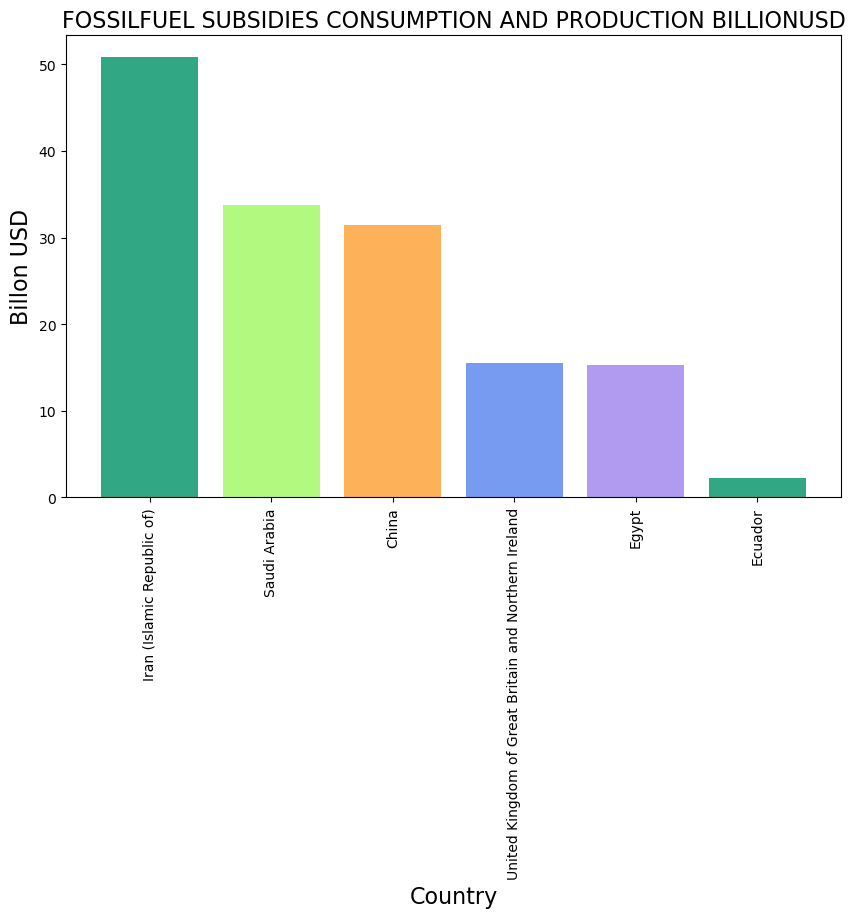

In [ ]:
custom_bar_plot('fossilfuel_subsidies_consumption_and_production_billionusd', 'Billon USD')

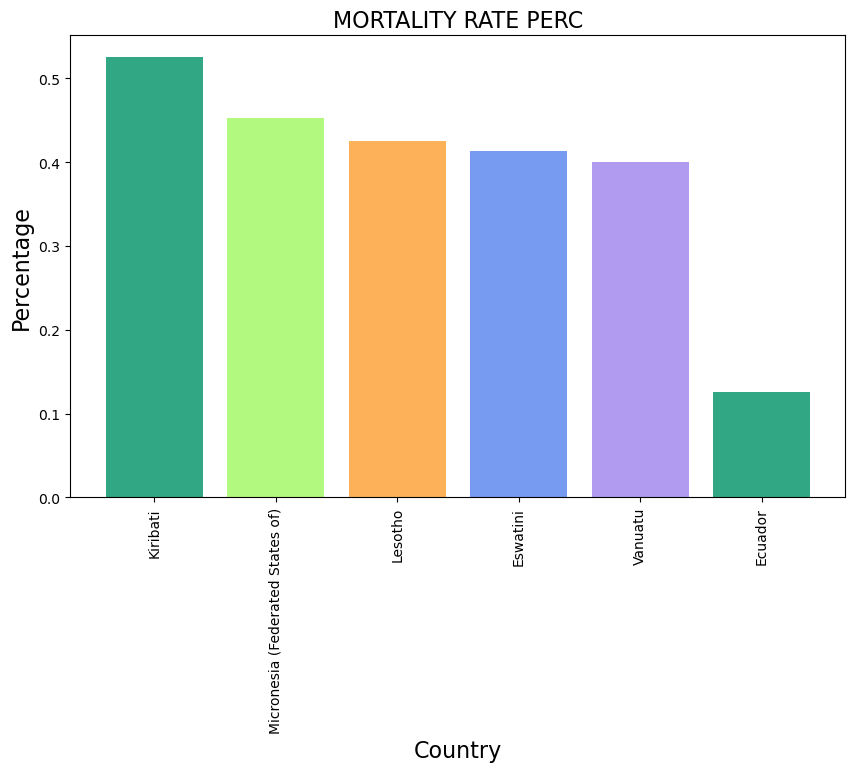

In [ ]:
custom_bar_plot('mortality_rate_perc', 'Percentage')

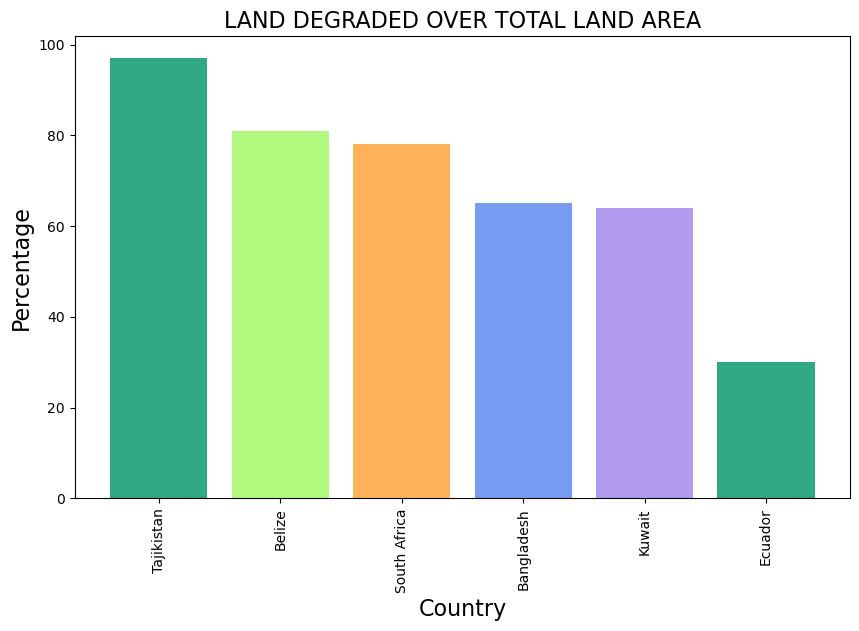

In [ ]:
custom_bar_plot('land_degraded_over_total_land_area', 'Percentage')

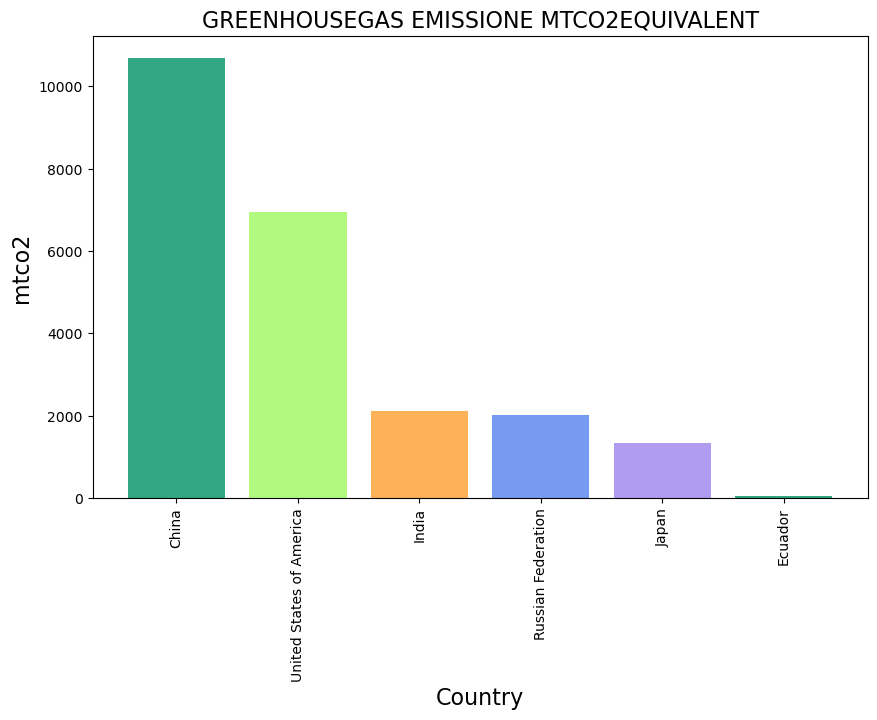

In [ ]:
custom_bar_plot('greenhousegas_emissione_mtco2equivalent', 'mtco2')

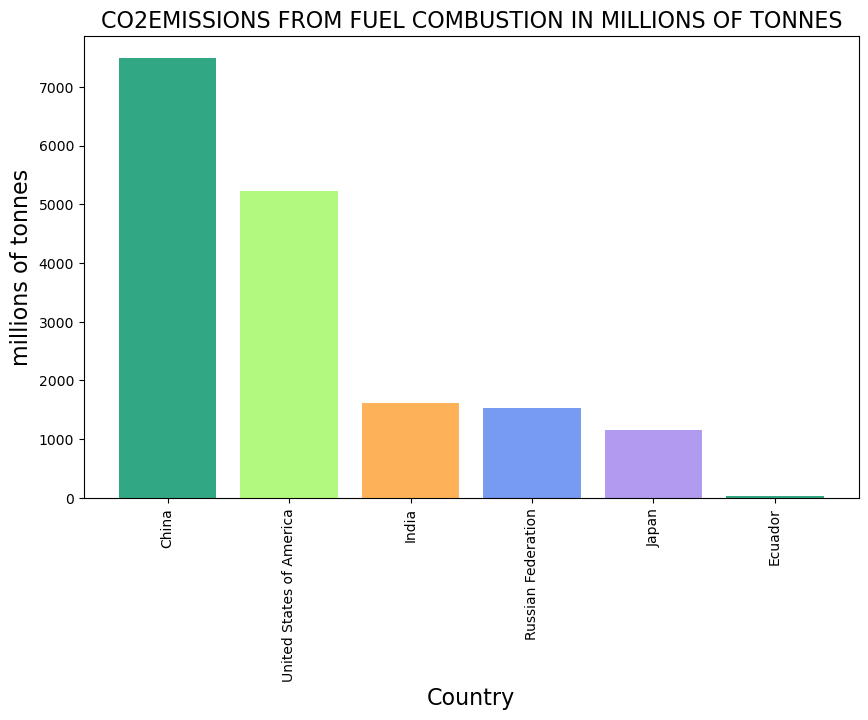

In [ ]:
custom_bar_plot('co2emissions_from_fuel_combustion_in_millions_of_tonnes', 'millions of tonnes')

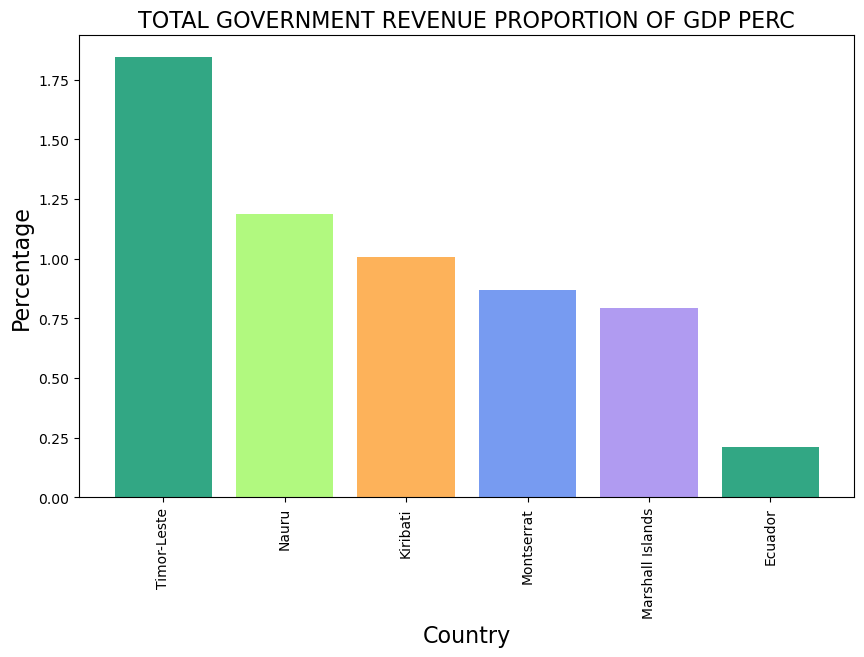

In [ ]:
custom_bar_plot('total_government_revenue_proportion_of_gdp_perc', 'Percentage')

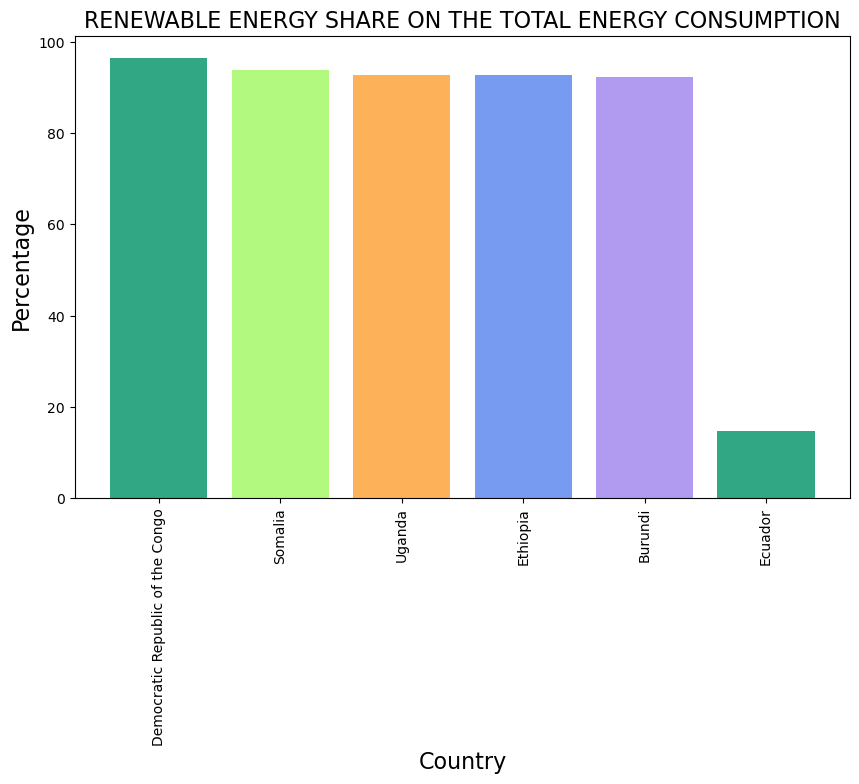

In [ ]:
custom_bar_plot('renewable_energy_share_on_the_total_energy_consumption', 'Percentage')

# -identificado los valores atípicos

In [ ]:
# Buscar outlier
# Fuente: https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
header = ['Features', '# Outliers', 'Outliers %', 'Max Value']
print(f'{header[0]:>60s}: {header[1]:>5}  {header[2]:>5} {header[3]:>10}')
for column in df[num_selector].columns:
    outliers = find_outliers_IQR(df[column])
    if len(outliers) > 0:
        print(f'{column:>60s}: {len(outliers):>10}  {len(outliers)/df.shape[0]:>10.3f} {outliers.max():>10}')

                                                    Features: # Outliers  Outliers %  Max Value
                     greenhousegas_emissione_mtco2equivalent:         93       0.020    12300.2
             total_government_revenue_proportion_of_gdp_perc:         57       0.012  3.6563463
                                      fdi_inflows_millionusd:        668       0.146   467625.0
                                     annual_growth_rate_perc:        258       0.056  0.9461399
                                         mortality_rate_perc:         15       0.003      0.545
     co2emissions_from_fuel_combustion_in_millions_of_tonnes:        404       0.088     9876.5
  fossilfuel_subsidies_consumption_and_production_billionusd:        169       0.037   81.62778
                      randd_expenditure_proportionofgdp_perc:        100       0.022  0.0494079
       number_of_companies_publishing_sustainability_reports:         37       0.008     2192.0
                          land_degraded_

-producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

In [ ]:
import plotly.express as px
corr = df[num_selector].corr()
fig = px.imshow(corr, text_auto=True, aspect='auto')
fig.show()

-comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron. (Nota: durante la pila final del programa, harán una presentación para una audiencia técnica que incluirá sus decisiones y procesos en los pasos de limpieza. Entre más notas tomen ahora, más fácil será la presentación. Para clarificar, esa presentación NO se entrega ahora).

Deberían comenzar a trabajar en su EDA* en profundidad y a hacer visuales multivariantes para la próxima parte 3 de esta tarea una vez que hayan presentado todas las tareas y el examen de cinturón para esta pila.